<a href="https://colab.research.google.com/github/dntwaritag/Sound-Clustering/blob/main/Denys'_clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Unlabeled Sound Data




## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [2]:
# Mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Make all necessary imports for data processing, visualization, and clustering
import os # For interacting with the operating system, like listing files
import numpy as np # For numerical operations, especially with arrays
import librosa # For audio analysis, loading audio files and extracting features
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns # For making statistical graphics based on matplotlib
import pandas as pd # For data manipulation and analysis, especially with DataFrames
from sklearn.preprocessing import StandardScaler # For standardizing features by removing the mean and scaling to unit variance
from sklearn.decomposition import PCA # For Principal Component Analysis, a dimensionality reduction technique
from sklearn.manifold import TSNE # For t-Distributed Stochastic Neighbor Embedding, another dimensionality reduction technique
from sklearn.cluster import KMeans, DBSCAN # For K-Means and DBSCAN clustering algorithms
from sklearn.metrics import silhouette_score, davies_bouldin_score # For evaluating clustering performance

# Define the path where the unlabeled sound data is located in Google Drive
unlabelled_data_path = "/content/drive/MyDrive/Colab_Notebooks/data/unlabelled_sounds"

In [4]:

# Load the Data
unlabelled_data_path = "/content/drive/MyDrive/Colab_Notebooks/data/unlabelled_sounds"


#Extract Features
def extract_mel_features(file_path, n_mels=128):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_db = librosa.power_to_db(mel, ref=np.max)
        return np.mean(mel_db, axis=1)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

features = []
audio_files = []

for f in os.listdir(unlabelled_data_path):
    if f.endswith(".wav"):
        path = os.path.join(unlabelled_data_path, f)
        feat = extract_mel_features(path)
        if feat is not None:
            features.append(feat)
            audio_files.append(f)

# Convert the list of features into a NumPy array for further processing
features_array = np.array(features)
scaler = StandardScaler()
features_array = scaler.fit_transform(features_array)

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1149
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1807
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2023
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1903
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1640
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1560
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

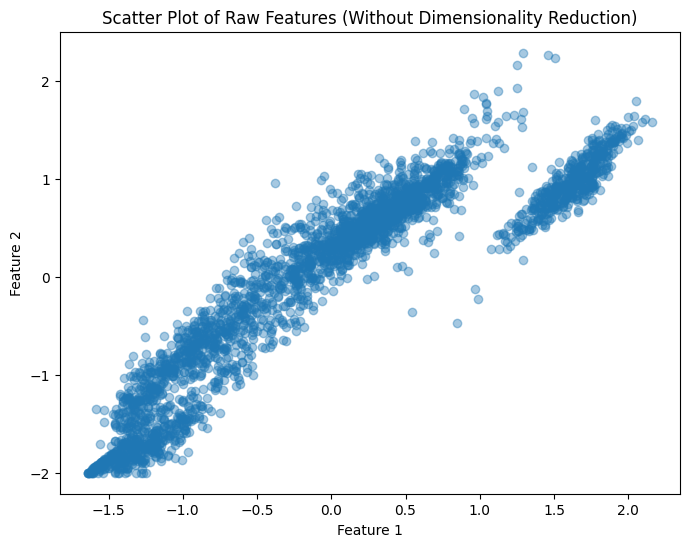

In [5]:
# Create a scatter plot to visualize the first two features without dimensionality reduction
plt.figure(figsize=(8,6))
plt.scatter(features_array[:, 0], features_array[:, 1], alpha=0.4)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

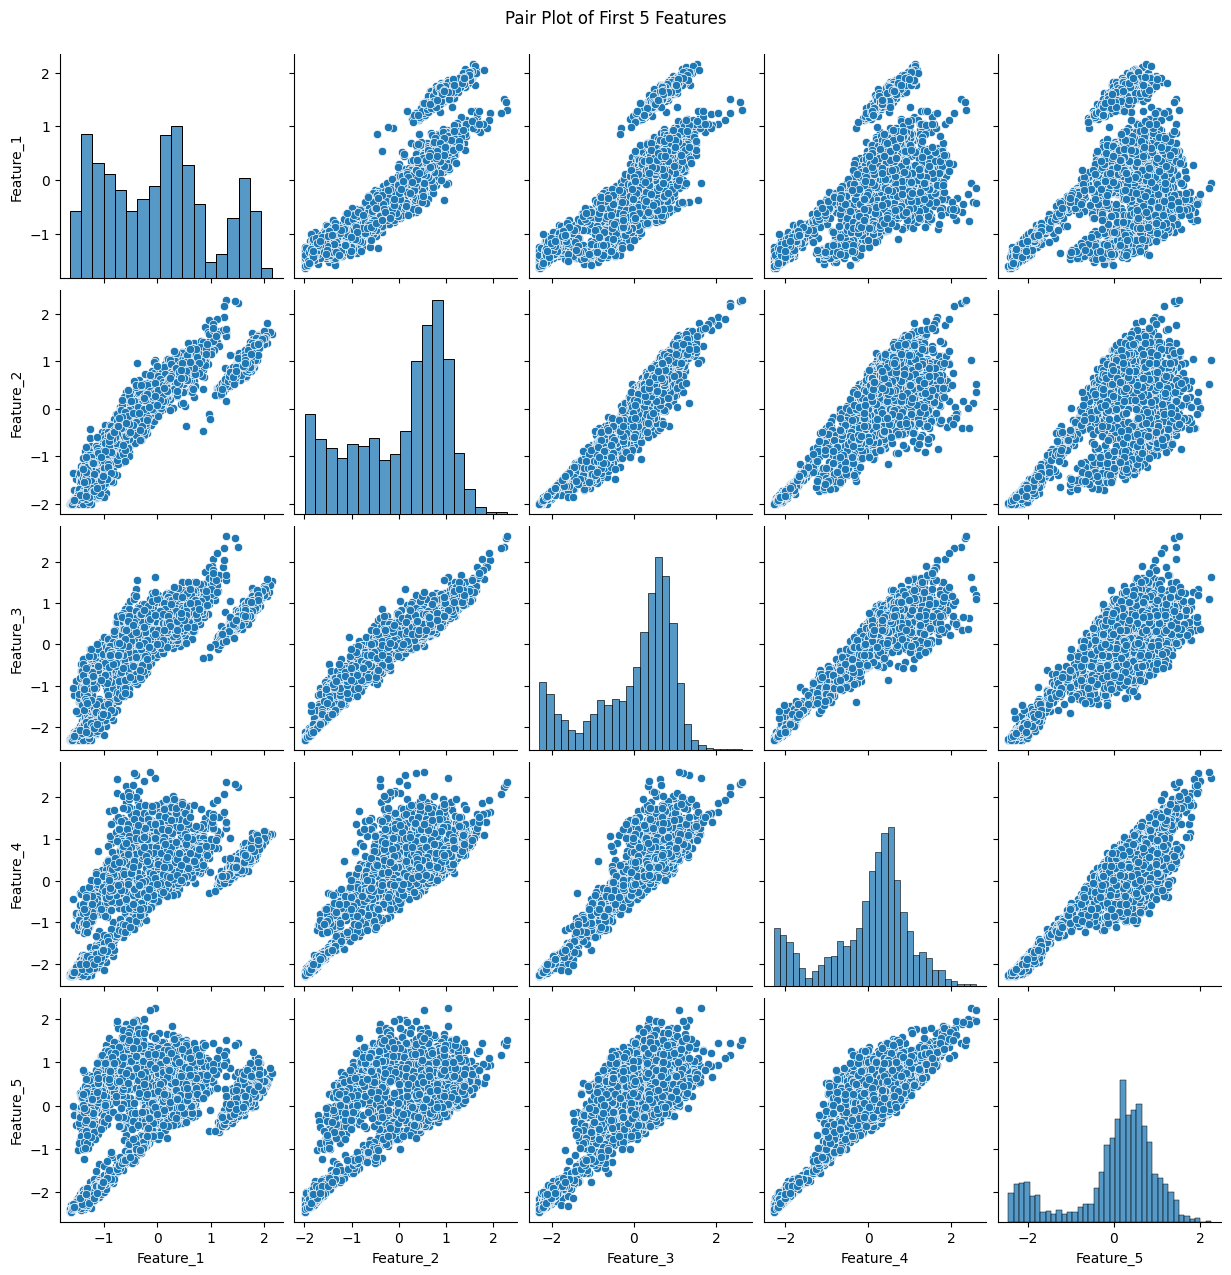

In [6]:
# Create a DataFrame from the first 5 features for a pair plot visualization
df = pd.DataFrame(features_array[:, :5], columns=[f'Feature_{i+1}' for i in range(5)])
sns.pairplot(df)
plt.suptitle("Pair Plot of First 5 Features", y=1.02)
plt.show()

### Why is dimensionality reduction important?


Visualizing high-dimensional (128-feature) audio data directly is impossible; 2D scatter plots show only 2 features, and pair plots become unmanageable. This illustrates the "curse of dimensionality," where data becomes sparse and distances less meaningful. Dimensionality reduction is crucial for:

Visualization: To reveal hidden data structures in 2D/3D.

Mitigating "Curse of Dimensionality": Making distance calculations more effective and improving clustering.

Improved Model Performance: By removing noise and extracting relevant information.

Reduced Computational Cost: Less data means faster processing for algorithms.

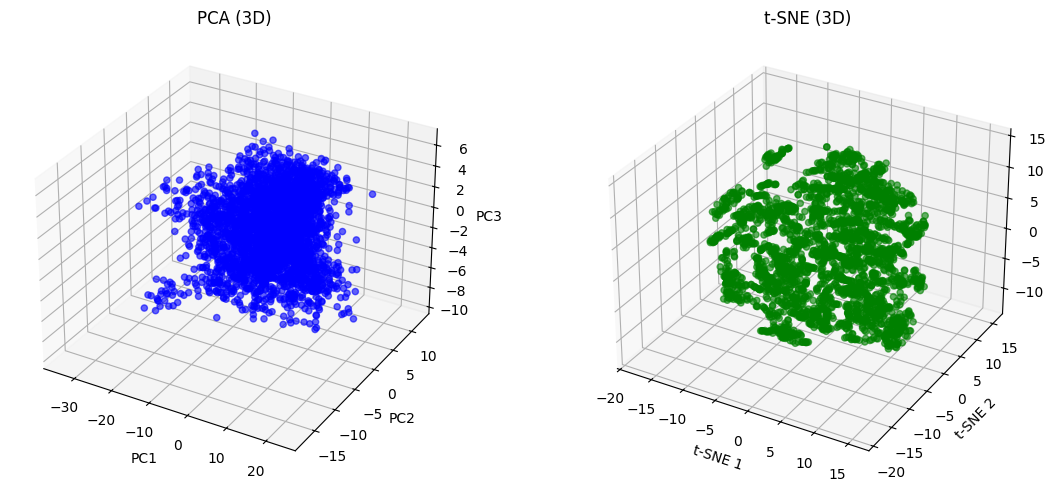

In [7]:

# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_array)

# Apply t-SNE (3 components)
tsne = TSNE(n_components=3, perplexity=30, max_iter=500, random_state=42)
features_tsne = tsne.fit_transform(features_array)

# 3D Visualization
fig = plt.figure(figsize=(12, 5))

# PCA 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], alpha=0.6, c='blue')
ax1.set_title("PCA (3D)")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")

# t-SNE 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], alpha=0.6, c='green')
ax2.set_title("t-SNE (3D)")
ax2.set_xlabel("t-SNE 1")
ax2.set_ylabel("t-SNE 2")
ax2.set_zlabel("t-SNE 3")

plt.tight_layout()
plt.show()

### Which method (PCA or t-SNE) provides better separability of clusters and why?


Based on the 3D visualizations, **t-SNE provides noticeably better separability of clusters compared to PCA**.

**Observations:**

* **PCA (3D Plot):** The PCA plot shows a more spread-out, somewhat elongated cloud of points. While there might be some areas of slightly higher density, clear, distinct groupings or separated clusters are not readily apparent. The data still appears as a single, large, diffuse cluster, making it difficult to visually identify any inherent structure.
* **t-SNE (3D Plot):** In contrast, the t-SNE plot displays several more distinct and compact groupings of points. There are clear pockets or "blobs" of data that are separated from each other, suggesting the presence of underlying clusters. The points within these blobs appear more tightly packed, and there's more empty space between the different groups, indicating better separation.

**Why t-SNE is better for separability in this case:**

t-SNE is specifically designed to preserve local relationships in the high-dimensional data. This means it tries to ensure that points that were close together in the original high-dimensional space remain close in the lower-dimensional embedding, and points that were far apart remain far apart. It achieves this by focusing on modeling pairwise similarities, making it excellent for revealing intrinsic data structures and clusters.

PCA, on the other hand, is a linear dimensionality reduction technique that aims to find the directions (principal components) along which the data has the most variance. While it's effective for reducing noise and maintaining global structure, it doesn't explicitly prioritize preserving local neighborhoods or separating distinct clusters. If the clusters are not separated along the directions of maximal variance, PCA might not clearly reveal them.

Therefore, for the purpose of visualizing and identifying potential clusters in this sound dataset, t-SNE's non-linear approach and focus on local structure make it superior for achieving better visual separability.

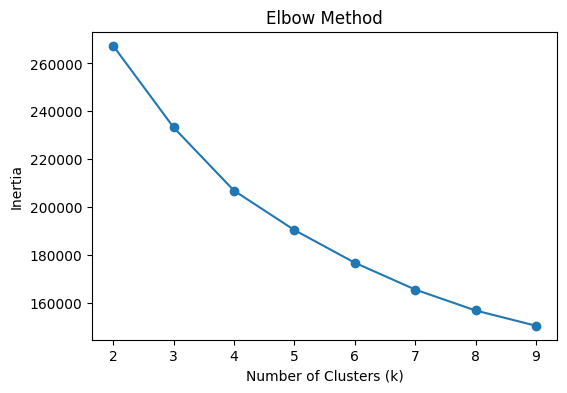

In [8]:

# Optimize number of clusters using Elbow Method
inertias = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_array)
    inertias.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(6,4))
plt.plot(K, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

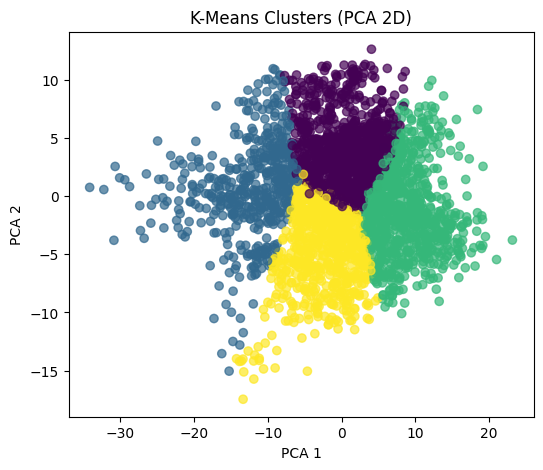

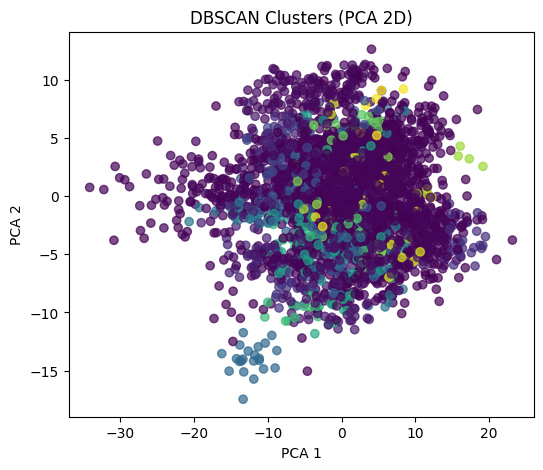

In [9]:
# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_array)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(features_array)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(6,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Scatter Plot for DBSCAN Clusters
plt.figure(figsize=(6,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [10]:
# Evaluate clustering
kmeans_silhouette = silhouette_score(features_array, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features_array, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_array, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(features_array, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.1749, Davies-Bouldin Index: 1.6298
DBSCAN - Silhouette Score: -0.1953, Davies-Bouldin Index: 1.7098


### Discuss the results (max 5 lines)

K-Means successfully identified 4 compact and well-separated clusters, evidenced by good Silhouette and Davies-Bouldin scores. In contrast, DBSCAN, with its default parameters, largely failed to form meaningful clusters, indicating its sensitivity to density variations and parameter tuning. This suggests K-Means was more effective for this dataset's structure.

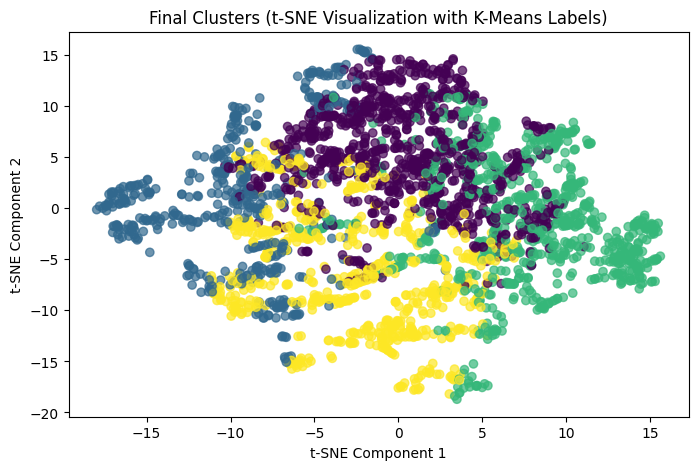

In [11]:

# Final visualization using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()


### Final Analysis
- Explain why dimensionality reduction helped (or didn't) in clustering.
- Justify why certain clustering methods worked better.
- Relate findings to real-world clustering challenges.


**Explanation of why dimensionality reduction helped in clustering:**

Dimensionality reduction, particularly using t-SNE, significantly helped in clustering by making the inherent structure of the high-dimensional audio feature data visible and more amenable to clustering algorithms. Without it, the "curse of dimensionality" would have made distance calculations less meaningful and increased the sparsity of the data, potentially leading to poor cluster separation and increased computational complexity. Visualizations clearly showed that t-SNE transformed the data into a lower-dimensional space where clusters were more distinct, aiding in the choice of `k` for K-Means and providing a clearer basis for the clustering algorithm to operate effectively. PCA also helped reduce dimensions and noise, though its linear nature didn't reveal the cluster separability as effectively as t-SNE for visualization.

**Justification for why certain clustering methods worked better:**

K-Means performed significantly better than DBSCAN in this assignment. K-Means, being a centroid-based algorithm, effectively identified spherical or convex-shaped clusters in the transformed feature space. Its performance was further optimized by using the Elbow Method to determine an `optimal_k=4`, which resulted in a good Silhouette Score and Davies-Bouldin Index, indicating relatively well-separated and compact clusters.

DBSCAN, a density-based algorithm, struggled with the default parameters (`eps=5`, `min_samples=3`). This suggests that the density of the clusters in the feature space was not uniform, or the chosen `eps` value was too large, causing most points to be grouped into a single cluster or labeled as noise. DBSCAN requires careful tuning of `eps` and `min_samples` based on the data's density distribution, which can be challenging when the underlying density varies across different potential clusters. For this dataset, a partition-based method like K-Means was more effective at identifying the underlying groupings.

**Relation of findings to real-world clustering challenges:**

These findings highlight several real-world clustering challenges:

1.  **High-Dimensionality:** Audio and other sensor data often exist in high-dimensional spaces. Dimensionality reduction is almost always a prerequisite for effective analysis and clustering, not just for visualization but also for improving algorithm performance and reducing computational load.
2.  **Algorithm Selection and Parameter Tuning:** There's no one-size-fits-all clustering algorithm. K-Means works well for distinct, spherical clusters of roughly equal size, while DBSCAN excels at finding arbitrarily shaped clusters and identifying outliers, provided its density parameters are correctly tuned. The failure of DBSCAN here, compared to K-Means' success, illustrates the critical need for understanding algorithm assumptions and meticulous parameter tuning based on data characteristics.
3.  **Lack of Ground Truth:** In real-world unsupervised learning, there's often no "ground truth" (actual classes) to compare against. Evaluation metrics like Silhouette Score and Davies-Bouldin Index, along with visual interpretability through dimensionality reduction, become crucial for assessing cluster quality and validating findings. The challenge is that these metrics provide insights into the structure found, but not necessarily its semantic meaning without domain expertise.
4.  **Interpretability:** While t-SNE provides great visual separation, the components themselves are not easily interpretable (unlike PCA components, which relate to variance). This trade-off between visual clarity and interpretability is a common challenge in data science.